<a href="https://colab.research.google.com/github/briannabinder/AME508_finalproject/blob/main/NEW120423CELmulitclass_Mas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import requests
import base64
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import scipy
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import DataLoader, TensorDataset
from scipy import signal
from scipy.io import wavfile
from torchsummary import summary
from skimage.transform import resize
from skimage import io, transform
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

In [2]:
folder_path = 'G:\My Drive\Colab_Notebooks\Project_Datasets\Train_Datasets'
folder_path1 ='G:\My Drive\Colab_Notebooks\Project_Datasets\Test_Datasets'

In [3]:
def to_categorical(y, num_classes):
    """ 1-hot encodes a tensor """
    return np.eye(num_classes, dtype='uint8')[y]

Train datasets Label Reader Mulit Hot Incoder

In [4]:
# Get a list of all files in the folder
file_list = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Specify the labels to encode
labels_to_encode = ['Wheeze', 'Stridor', 'Rhonchi']

# List to store all multi-hot encoded matrices
all_multi_hot_matrices = []
all_filtered_name_1 =[]

# Iterate through each file
for file_name in file_list:
    if file_name.endswith('.txt'):  # Check if the file is a .txt file
        file_path = os.path.join(folder_path, file_name)

        # Read the content of the .txt file with different encodings
        for encoding in ['utf-8', 'latin-1', 'ISO-8859-1']:
            try:
                with open(file_path, 'r', encoding=encoding) as file:
                    label_lines = file.readlines()
                break  # Stop trying encodings if successful
            except UnicodeDecodeError:
                continue  # Try the next encoding if decoding fails

        # Parse labels and time intervals
        labels_and_intervals = []
        for line in label_lines:
            parts = line.strip().split()
            if parts and parts[0] != 'D':  # Check if the line is not empty and doesn't start with 'D'
                label = parts[0]
                labels_and_intervals.append(label)

        # Create a single-row multi-hot encoded matrix for the current file
        multi_hot_encoded_vector = []

        # Check if any of the specified labels are detected
        labels_detected = any(label_row in labels_and_intervals for label_row in labels_to_encode)

        for label_row in labels_to_encode:
            # Check if the label_row is in the labels_and_intervals
            if label_row in labels_and_intervals:
                multi_hot_vector = 1
            else:
                multi_hot_vector = 0

            multi_hot_encoded_vector.append(multi_hot_vector)

        # If none of the specified labels are detected, set 'Normal' to 1
        #if not labels_detected:
        #    multi_hot_encoded_vector[-1] = 1


        # Check if there are multiple occurrences of '1' in the multi-hot vector
        if multi_hot_encoded_vector.count(1) == 1:
            # Append the multi-hot encoded vector to the list
            all_multi_hot_matrices.append({
                'file_name': file_name,
                'vector': multi_hot_encoded_vector
            })

        else:
            print(f"Excluded file: {file_name}, multi-hot vector: {multi_hot_encoded_vector}")
            # Append the multi-hot encoded vector to the list
            all_filtered_name_1.append({
            'file_name': file_name,
            'vector': multi_hot_encoded_vector
            })

# Create a NumPy array to store all the vectors
multi_hot_matrices = np.array([item['vector'] for item in all_multi_hot_matrices])

# Print the total count of files
#print(all_multi_hot_matrices.shape)

Streaming output truncated to the last 5000 lines.
Excluded file: steth_20190728_13_20_33_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190728_13_44_00_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190702_14_50_17_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190728_13_45_52_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190702_14_48_18_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190702_14_49_50_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190728_13_47_11_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190728_13_47_33_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190702_14_48_47_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190702_14_47_56_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190702_14_57_10_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190702_14_54_37_label.txt, multi-hot vector: [0, 0, 0]
Excluded file

In [5]:
# Display the first 20 examples and their labels matrix
#print(multi_hot_matrices)
'''
for i in range(min(5, len(all_multi_hot_matrices))):
    example = all_multi_hot_matrices[i]
    file_name = example['file_name']
    vector = example['vector']


    print(f"Example {i + 1} - File: {file_name}")
    print(f"Labels Matrix: {vector}")
    print()
'''

# Extract base filenames by removing '_label.txt' from 'file_name'
base_filenames_1 = [os.path.splitext(item['file_name'])[0].replace('_label', '') for item in all_filtered_name_1]

# Create a new list with modified 'file_name' values
all_filtered_name_1_modified = [{'file_name': base_filename + '.wav', 'vector': item['vector']} for base_filename, item in zip(base_filenames_1, all_filtered_name_1)]

#print(all_filtered_name_1_modified)

a = np.array(multi_hot_matrices)
One_hot_matrices = np.where(a==1)[1]

#print(One_hot_matrices)
#print(One_hot_matrices.shape)
train_cat = to_categorical(One_hot_matrices,3)
print(train_cat.shape)

(2630, 3)


Train dataset image

nperseg: 447 noverlap: 180
File: steth_20190622_15_04_06.wav, Spectrogram shape: (224, 224)


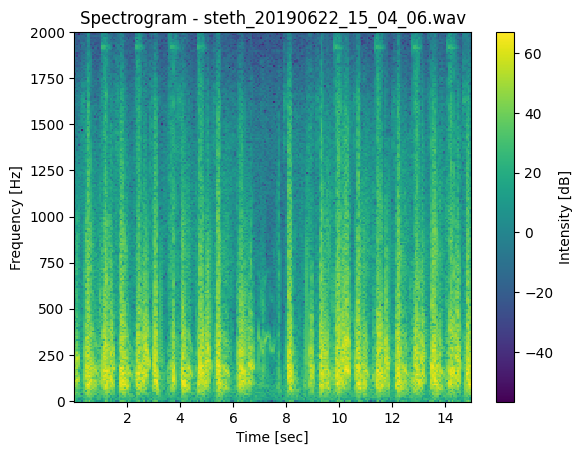

In [6]:
# Get a list of all files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.wav')]


all_spectrograms_1 = []

steth_sample_rate = 4000
duration = 15
total_samples = steth_sample_rate * duration
num_freq_bins = 224
num_time_steps = 224

nperseg = 2 * num_freq_bins - 1  # (Nyquist limit)

  # num_time_steps = (total samples - noverlap) / (nperseg - noverlap)
  # t = s - o / p - o
  # tp - to = s - o
  # o = (tp - s) / (t - 1)

noverlap =  round((num_time_steps * nperseg - total_samples) / (num_time_steps - 1))
print("nperseg:", nperseg, "noverlap:", noverlap)

# Iterate through each .wav file in the folder
for wav_file in file_list:
    # Construct the full path to the .wav file
    wav_file_path = os.path.join(folder_path, wav_file)

    # Check if the modified .wav file name is NOT in all_filtered_name_1_modified
    modified_wav_file_name1 = os.path.splitext(wav_file.replace('_label', ''))[0] + '.wav'
    # Check if the modified .wav file name is NOT in all_filtered_name_2_modified
    if not any(item['file_name'] == modified_wav_file_name1 for item in all_filtered_name_1_modified):
      # Read the WAV file
      sample_rate, samples = wavfile.read(wav_file_path)

      # Compute the spectrogram
      frequencies, times, spectrogram = scipy.signal.spectrogram(samples, fs=sample_rate, nperseg=nperseg, noverlap=noverlap)

      # Apply logarithmic transformation
      log_spectrogram = 10 * np.log10(spectrogram)


      # Trim the spectrogram to have a shape of (224, 224)
      # log_spectrogram = log_spectrogram[:224, :224]


      # Store the log_spectrogram in the list
      all_spectrograms_1.append(log_spectrogram)


# Print the shape of the first spectrogram
print(f"File: {file_list[0]}, Spectrogram shape: {all_spectrograms_1[0].shape}")



# Plot the first spectrogram
plt.pcolormesh(times, frequencies, all_spectrograms_1[0], shading='auto')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f'Spectrogram - {file_list[0]}')
plt.colorbar(label='Intensity [dB]')
plt.show()
all_spectrograms_1 = np.reshape(np.array(all_spectrograms_1), newshape=(2630,1,224,224))

Test_datasets Label Reader Mulit Hot Incoder

In [7]:
# Get a list of all files in the folder
file_list2 = [f for f in os.listdir(folder_path1) if os.path.isfile(os.path.join(folder_path1, f))]

# Specify the labels to encode
labels_to_encode = ['Wheeze', 'Stridor', 'Rhonchi']

# List to store all multi-hot encoded matrices
all_multi_hot_matrices_2 = []
all_filtered_name_2 =[]

# Iterate through each file
for file_name in file_list2:
    if file_name.endswith('.txt'):  # Check if the file is a .txt file
        file_path = os.path.join(folder_path1, file_name)

        # Read the content of the .txt file with different encodings
        for encoding in ['utf-8', 'latin-1', 'ISO-8859-1']:
            try:
                with open(file_path, 'r', encoding=encoding) as file:
                    label_lines = file.readlines()
                break  # Stop trying encodings if successful
            except UnicodeDecodeError:
                continue  # Try the next encoding if decoding fails

        # Parse labels and time intervals
        labels_and_intervals = []
        for line in label_lines:
            parts = line.strip().split()
            if parts and parts[0] != 'D':  # Check if the line is not empty and doesn't start with 'D'
                label = parts[0]
                labels_and_intervals.append(label)

        # Create a single-row multi-hot encoded matrix for the current file
        multi_hot_encoded_vector1 = []

        # Check if any of the specified labels are detected
        labels_detected = any(label_row in labels_and_intervals for label_row in labels_to_encode)


        for label_row in labels_to_encode:
            # Check if the label_row is in the labels_and_intervals
            if label_row in labels_and_intervals:
                multi_hot_vector = 1
            else:
                multi_hot_vector = 0

            multi_hot_encoded_vector1.append(multi_hot_vector)

        # If none of the specified labels are detected, set 'Normal' to 1
        #if not labels_detected:
        #    multi_hot_encoded_vector1[-1] = 1


        # Append the multi-hot encoded vector to the list
        # Check if there are multiple occurrences of '1' in the multi-hot vector
        if multi_hot_encoded_vector1.count(1) == 1:
            # Append the multi-hot encoded vector to the list
             all_multi_hot_matrices_2.append({
                'file_name': file_name,
                'vector': multi_hot_encoded_vector1
            })
        else:
            print(f"Excluded file: {file_name}, multi-hot vector: {multi_hot_encoded_vector1}")
            all_filtered_name_2.append({
            'file_name': file_name,
            'vector': multi_hot_encoded_vector1
            })


# Create a NumPy array to store all the vectors
multi_hot_matrices_2 = np.array([item['vector'] for item in all_multi_hot_matrices_2])
#all_filtered_name_2 =  np.array([item['file_name'] for item in all_filtered_name_2])
#multi_hot_matrices_2 = multi_hot_matrices_2.reshape(-1.1)
print(multi_hot_matrices_2.shape)


Excluded file: steth_20190821_08_51_02_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190824_21_47_03_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190824_21_49_08_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190816_22_13_09_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190821_08_46_54_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190821_08_46_00_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190816_22_15_21_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190824_21_52_59_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190822_14_54_41_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190816_22_15_48_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190824_21_50_21_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190816_22_12_31_label.txt, multi-hot vector: [0, 0, 0]
Excluded file: steth_20190824_21_47_32_label.txt, multi-hot vect

In [8]:

# Extract base filenames by removing '_label.txt' from 'file_name'
base_filenames_2 = [os.path.splitext(item['file_name'])[0].replace('_label', '') for item in all_filtered_name_2]

# Create a new list with modified 'file_name' values
all_filtered_name_2_modified = [{'file_name': base_filename + '.wav', 'vector': item['vector']} for base_filename, item in zip(base_filenames_2, all_filtered_name_2)]

#print(all_filtered_name_2_modified)
print(multi_hot_matrices_2.shape)

a = np.array(multi_hot_matrices_2)
One_hot_matrices_2 = np.where(a==1)[1]

print(One_hot_matrices_2)
print(One_hot_matrices_2.shape)

test_cat = to_categorical(One_hot_matrices_2,3)
print(test_cat.shape)

(609, 3)
[2 2 0 2 2 2 2 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 0 2 0 0 2 0 2 0 0 1 0 1 0
 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 2 2 0 2 0 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0
 2 0 0 2 2 0 0 0 2 2 0 2 2 2 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 2 2 0
 0 1 0 0 0 0 0 0 0 0 0 2 2 0 2 2 2 2 0 2 0 0 2 2 2 2 0 0 0 0 0 2 2 2 0 0 0
 0 0 0 2 0 0 0 0

Test datasets .wav

nperseg: 447 noverlap: 180
File: steth_20190808_10_49_19.wav, Spectrogram shape: (224, 224)


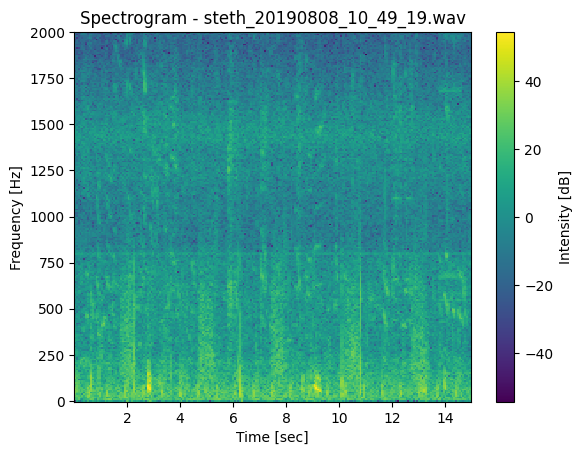

In [9]:
# Get a list of all files in the folder
file_list1 = [f for f in os.listdir(folder_path1) if f.endswith('.wav')]

all_spectrograms_2 = []

steth_sample_rate = 4000
duration = 15
total_samples = steth_sample_rate * duration
num_freq_bins = 224
num_time_steps = 224

nperseg = 2 * num_freq_bins - 1  # (Nyquist limit)

  # num_time_steps = (total samples - noverlap) / (nperseg - noverlap)
  # t = s - o / p - o
  # tp - to = s - o
  # o = (tp - s) / (t - 1)

noverlap =  round((num_time_steps * nperseg - total_samples) / (num_time_steps - 1))
print("nperseg:", nperseg, "noverlap:", noverlap)

# Iterate through each .wav file in the folder
for wav_file in file_list1:
    # Construct the full path to the .wav file
    wav_file_path = os.path.join(folder_path1, wav_file)

    modified_wav_file_name = os.path.splitext(wav_file.replace('_label', ''))[0] + '.wav'
    # Check if the modified .wav file name is NOT in all_filtered_name_2_modified
    if not any(item['file_name'] == modified_wav_file_name for item in all_filtered_name_2_modified):

        # Read the WAV file
        sample_rate, samples = wavfile.read(wav_file_path)

        # Compute the spectrogram
        frequencies, times, spectrogram = scipy.signal.spectrogram(samples, fs=sample_rate, nperseg=nperseg, noverlap=noverlap)

        # Apply logarithmic transformation
        log_spectrogram = 10 * np.log10(spectrogram)


        # Trim the spectrogram to have a shape of (224, 224)
        # log_spectrogram = log_spectrogram[:224, :224]


        # Store the log_spectrogram in the list
        all_spectrograms_2.append(log_spectrogram)


# Print the shape of the first spectrogram
print(f"File: {file_list1[0]}, Spectrogram shape: {all_spectrograms_2[0].shape}")



# Plot the first spectrogram
plt.pcolormesh(times, frequencies, all_spectrograms_2[0], shading='auto')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f'Spectrogram - {file_list1[0]}')
plt.colorbar(label='Intensity [dB]')
plt.show()

all_spectrograms_2 = np.reshape(np.array(all_spectrograms_2), newshape=(609,1,224,224))

In [10]:
print(all_spectrograms_2.shape)

(609, 1, 224, 224)


Train datasets Label Reader Mulit Hot Incoder


CustomDataset

In [11]:
class CustomDataset(Dataset):
    def __init__(self, samples, labels):
        """
        Initialize the CustomDataset with paired samples.

        Args:
            samples (list of tuples): A list of (x, y) pairs representing the dataset samples.
        """
        self.samples = torch.Tensor(samples).to(torch.float32)
        self.labels = torch.Tensor(labels).to(torch.float32)

    def __len__(self):
        """
        Returns the length of the dataset, i.e., the number of samples.
        """
        return len(self.samples)

    def __getitem__(self, idx):
        """
        Returns the sample pairs corresponding to the given list of indices.

        Args:
            indices (list): A list of indices to retrieve samples for.

        Returns:
            list: A list of (x, y) pairs corresponding to the specified indices.
        """
        selected_sample = self.samples[idx]
        selected_label = self.labels[idx]
        return selected_sample , selected_label

In [12]:
batch_size = 32

train_dataset = CustomDataset(all_spectrograms_1,train_cat)

test_dataset = CustomDataset(all_spectrograms_2,test_cat)

trainloader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size , shuffle=True)

testloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=batch_size)

 VGG16 CNN as feature extractors



In [13]:
class N_conv(nn.Module):
    """
    This a class for defining the N convolution
    Attributes
    ----------
    conv  : nn.Sequential
        defines the train model
    """
    def __init__(self,in_channels,out_channels,N = 2):
        super(N_conv,self).__init__()
        model = []
        model.append(nn.Conv2d(in_channels,out_channels,kernel_size=(3,3),padding=(1,1)))
        model.append(nn.ReLU(True))
        for i in range(N-1):
            model.append(nn.Conv2d(out_channels,out_channels,kernel_size=(3,3),padding=(1,1)))
            model.append(nn.ReLU(True))
        model.append(nn.MaxPool2d(kernel_size=(2,2),stride=(2,2)))
        self.conv = nn.Sequential(*model)
    def forward(self,x):
        return self.conv(x)

In [14]:
class VGG16(nn.Module):
    def __init__(self, verbose=False):
        super(VGG16, self).__init__()
        self.conv1_1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(25088, 4096)
        self.dropout = nn.Dropout(0.5)  # Add dropout with a probability of 0.5
        self.fc2 = nn.Linear(4096, 4096)
        self.dropout = nn.Dropout(0.5)  # Add dropout with a probability of 0.5
        self.fc3 = nn.Linear(4096, 3)

        self.verbose = verbose

    def forward(self, x):
        if self.verbose:
            print(f"Input shape: {x.size()}")

        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.pool1(x)
        if self.verbose:
            print(f"After Layer 1: {x.size()}")

        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.pool2(x)
        if self.verbose:
            print(f"After Layer 2: {x.size()}")

        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = self.pool3(x)
        if self.verbose:
            print(f"After Layer 3: {x.size()}")

        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = self.pool4(x)
        if self.verbose:
            print(f"After Layer 4: {x.size()}")

        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = F.relu(self.conv5_3(x))
        x = self.pool5(x)
        if self.verbose:
            print(f"After Layer 5 {x.size()}")

        x = torch.flatten(x,1)
        #x = torch.unsqueeze(1,x)
        if self.verbose:
            print(f"Flattened: {x.size()}")

        x = F.relu(self.fc1(x))
        if self.verbose:
            print(f"After first Fully connected layer: {x.size()}")

        x = self.dropout(x)  # Apply dropout
        if self.verbose:
            print(f"After dropout: {x.size()}")

        x = F.relu(self.fc2(x))
        if self.verbose:
            print(f"After Secound Fully connected layer: {x.size()}")

        x = self.dropout(x)  # Apply dropout
        if self.verbose:
            print(f"After dropout: {x.size()}")

        x = self.fc3(x)

        # Apply softmax activation to the last layer
        #x = F.softmax(x,1)
        #x = torch.softmax(x,1)
        #x = torch.sigmoid(x)
        if self.verbose:
            print(f"Output shape: {x.size()}")

        return x

In [24]:
class Vgg16(nn.Module):
    """
    This a class for defing the VGG16 model
    Attributes
    ----------
    conv  : nn.Sequential
        defines the train model
    """
    def __init__(self,in_channels=3,out_channels=1,init_weights=True):
        super(Vgg16,self).__init__()
        self.conv1 = N_conv(1,64)
        self.conv2 = N_conv(64,128)
        self.conv3 = N_conv(128,256,N=3)
        self.conv4 = N_conv(256,512,N=3)
        self.conv5 = N_conv(512,512,N=3)
        self.avgpool = nn.AdaptiveAvgPool2d((7,7))
        self.linear1 = nn.Linear(512*7*7,4096)
        self.linear2 = nn.Linear(4096,4096)
        self.relu = nn.ReLU(True)
        self.dropout = nn.Dropout(0.3)
        self.linear3 = nn.Linear(4096,3)
        if init_weights:
            self._initialize_weights()
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(
                    m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)
    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.avgpool(x)
        x = torch.flatten(x,1)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear3(x)
        #x = torch.sigmoid(x)
        return x

Check for GPU

In [16]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


Testing VGG16 CNN shape size

In [17]:
print("Intermediate shapes for VGG16")
#model = Vgg16(1,1).to(device)

#output = model(torch.ones(size=(1,1,224,224)))
# More infor on VGG16 (https://builtin.com/machine-learning/vgg16)

Intermediate shapes for VGG16


In [18]:
torch.cuda.empty_cache()

torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |

Training VGG16 CNN

In [77]:
model = Vgg16().to(device)
criterion = nn.CrossEntropyLoss()
#criterion = nn.BCELoss()
#criterion = torch.nn.BCELossWithLogits()
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(),weight_decay=1e-8,lr = learning_rate)
n_epoch   = 10
n_batches = len(trainloader)
print_every = 1

loss_hist = np.zeros(n_epoch*n_batches)
acc_hist  = np.zeros(n_epoch*n_batches)

all_labels =[]
all_predictions =[]
pred=[]

it = 0
for epoch in range(n_epoch):  # loop over the dataset multiple times

    #loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #inputs = inputs/ 255

        # Print inputs and labels
        #print('Inputs:', inputs)
        #print('Labels:', labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs.to(device))
        # Print raw outputs from the model
        #print("Raw Outputs:", outputs)
        loss = criterion(outputs, labels.to(device))
        loss.backward()

        optimizer.step()

        # save loss
        loss_hist[it] = loss.item()
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        acc_hist[it] = 100.0*np.sum(predicted.cpu().numpy() == np.argmax(labels.numpy(), axis=1))/labels.size(0)
        #print(predicted)
        #print(np.argmax(labels.cpu().numpy(), axis=1))
        #all_labels.extend(predicted.cpu().numpy())
        #all_predictions.extend(predicted.cpu().detach())
        # Append true labels and predicted labels
        # Assuming labels is one-hot encoded, convert it to class indices
        all_labels.extend(np.argmax(labels.cpu().numpy(), axis=1))
        all_predictions.extend(predicted.cpu().numpy())

        if (i+1) % print_every == 0:    # print every 50 mini-batches
            #vacc_hist[iter//print_every] = find_vacc(net,testloader)
            print('epoch = {}/{}, minibatch = {}/{}, loss = {}, accuracy = {}'.format(epoch+1, n_epoch, i+1, n_batches, loss.item(), acc_hist[it]))

        it+=1


conf_matrix = confusion_matrix(all_labels, all_predictions)


print('Finished Training')

epoch = 1/10, minibatch = 1/83, loss = 1.8036391735076904, accuracy = 18.75
epoch = 1/10, minibatch = 2/83, loss = 452717281280.0, accuracy = 87.5
epoch = 1/10, minibatch = 3/83, loss = 638.8108520507812, accuracy = 28.125
epoch = 1/10, minibatch = 4/83, loss = 65477304.0, accuracy = 21.875
epoch = 1/10, minibatch = 5/83, loss = 63360096.0, accuracy = 65.625
epoch = 1/10, minibatch = 6/83, loss = 86657.453125, accuracy = 65.625
epoch = 1/10, minibatch = 7/83, loss = 521246.21875, accuracy = 15.625
epoch = 1/10, minibatch = 8/83, loss = 95641.046875, accuracy = 9.375
epoch = 1/10, minibatch = 9/83, loss = 197529.9375, accuracy = 31.25
epoch = 1/10, minibatch = 10/83, loss = 1554941.5, accuracy = 28.125
epoch = 1/10, minibatch = 11/83, loss = 57786.390625, accuracy = 12.5
epoch = 1/10, minibatch = 12/83, loss = 2400.9111328125, accuracy = 0.0
epoch = 1/10, minibatch = 13/83, loss = 816923.75, accuracy = 9.375
epoch = 1/10, minibatch = 14/83, loss = 7138.5625, accuracy = 53.125
epoch = 1/

Plotting training losses

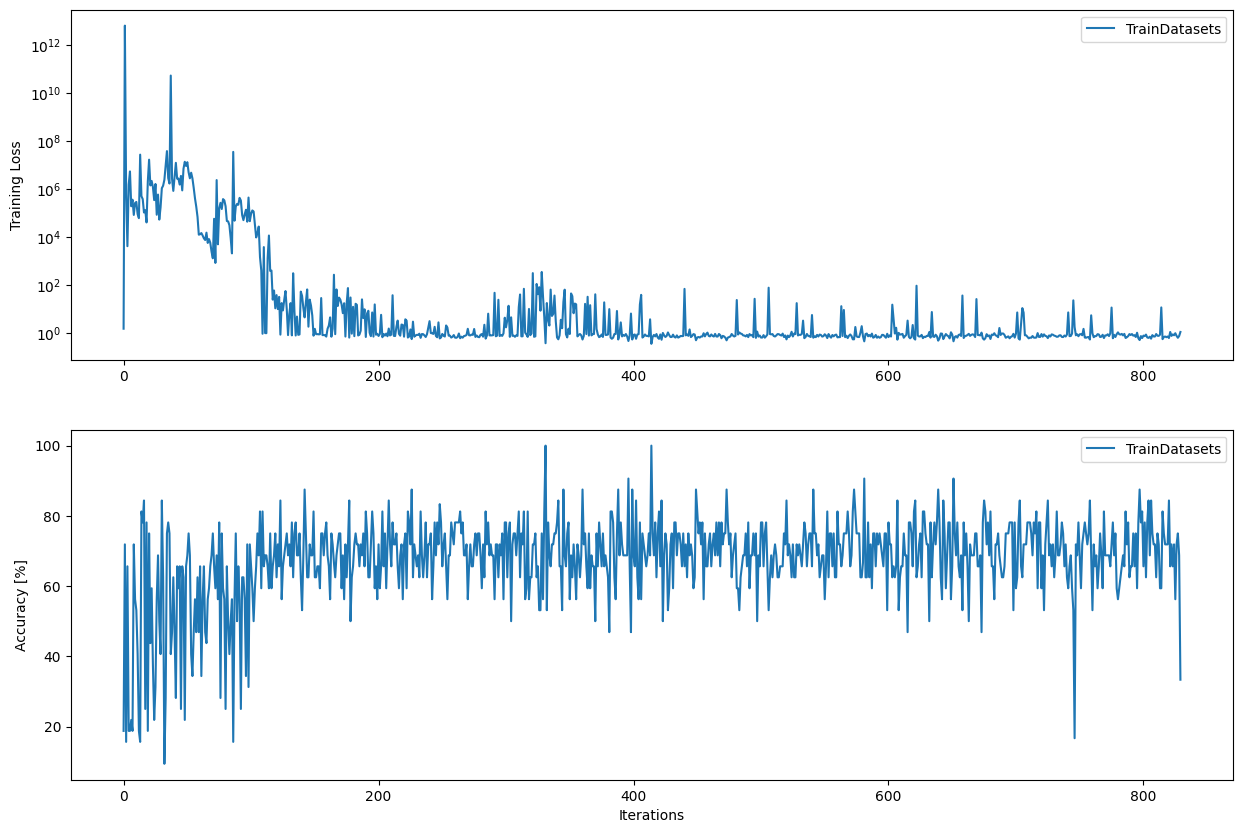

In [46]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].plot(loss_hist, label = "TrainDatasets")
axs[0].set_yscale('log')
axs[0].set_ylabel('Training Loss')
axs[0].legend()


axs[1].plot(acc_hist, label = "TrainDatasets")
axs[1].set_ylabel('Accuracy [%]')
axs[1].set_xlabel('Iterations')
axs[1].legend()

[2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 

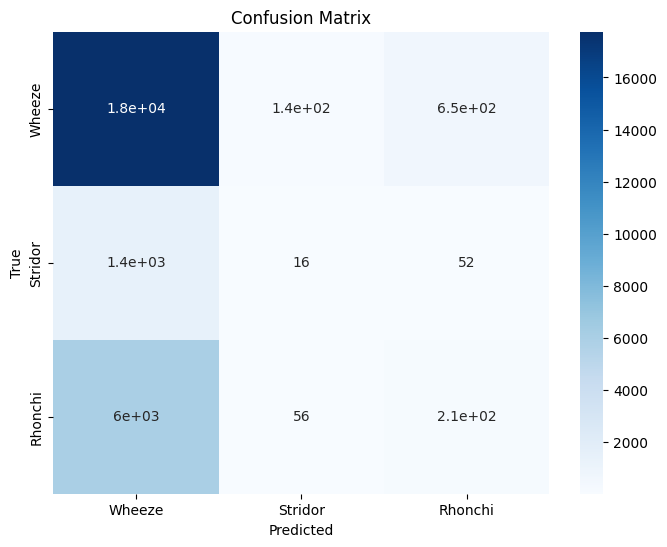

In [79]:
classes = ['Wheeze', 'Stridor', 'Rhonchi']
print(all_labels)
print(all_predictions)
cm = confusion_matrix(all_labels, all_predictions)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Testing

In [42]:
torch.cuda.empty_cache()

torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   2068 MiB |   8392 MiB |   2966 GiB |   2964 GiB |\n|       from large pool |   2064 MiB |   8383 MiB |   2964 GiB |   2962 GiB |\n|       from small pool |      4 MiB |     11 MiB |      2 GiB |      2 GiB |\n|---------------------------------------------------------------------------|\n| Active memory         |   2068 MiB |   8392 MiB |   2966 GiB |   2964 GiB |\n|       from large pool |   2064 MiB |   8383 MiB |

In [78]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
# Find accuracy over testing set
test_labels = []
test_predictions = []
y_pred1 = []
y_true1 =[]
classes = ['Wheeze', 'Stridor', 'Rhonchi']
nb_classes = 3

# Initialize the prediction and label lists(tensors)
def find_vacc(net,loader):
    correct = 0
    total = 0
    model.eval()  # Set the model to evaluation mode
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in loader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images.to(device))
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += np.sum(predicted.cpu().numpy() == np.argmax(labels.numpy(), axis=1))
            #print(total)
            #print(correct)
            # Save true and predicted labels for further analysis
            y_true.extend(np.argmax(labels.cpu().numpy(), axis =1))
            y_pred.extend(predicted.cpu().numpy())


    vacc = 100.0 * correct / total
    return vacc

test_acc = find_vacc(model, testloader)

CM = confusion_matrix(y_true, y_pred)
#conf_matrix = confusion_matrix(test_labels, test_predictions)
print(f'Accuracy of the network trained on the test images: {test_acc} %')

Accuracy of the network trained on the test images: 58.29228243021346 %


Confusion matrix

[0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 

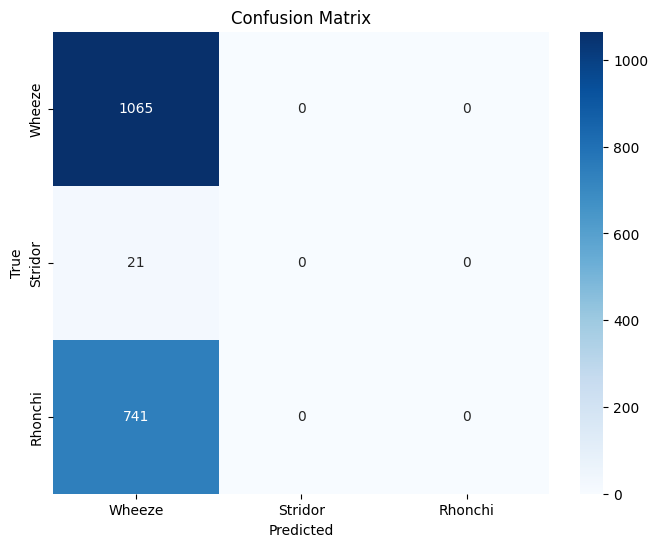

In [80]:
import pandas as pd
# Convert lists to numpy arrays


print(y_true)
print(y_pred)
#print(test_labels)
#test_predictions = np.argmax(test_predictions, axis=1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
